# import library 

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import string
# nltk tools 
import nltk
nltk.download()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# sklearn tools
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
with open('C:/Users/Aniket/Downloads/CETM47-22_23-AS2-Data.json') as json_file:
    json_data = json.load(json_file)

In [3]:
 df=pd.read_json('C:/Users/Aniket/Downloads/CETM47-22_23-AS2-Data.json')
print(df)

                                                   text       date  label  \
0     The {@Clinton LumberKings@} beat the {@Cedar R... 2019-09-08      4   
1     I would rather hear Eli Gold announce this Aub... 2019-09-08      4   
2     Someone take my phone away, I’m trying to not ... 2019-09-08      4   
3     A year ago, Louisville struggled to beat an FC... 2019-09-08      4   
4     Anyone know why the #Dodgers #Orioles game nex... 2019-09-08      4   
...                                                 ...        ...    ...   
6438  Praying for {{USERNAME}} family friends riding... 2021-08-29      3   
6439  Etsy: {{USERNAME}} Hi there, I m sorry to hear... 2021-08-29      1   
6440  Imagine how hard it is to be a Teume. Everyone... 2021-08-29      2   
6441  Ride With Me - Mental Health Awareness Charity... 2021-08-29      2   
6442  Prediction: The future of CX in {@McKinsey Com... 2021-08-29      1   

                       id                label_name  
0     117051632441986

In [4]:
print(len(df))

6443


In [5]:
df.shape

(6443, 5)

In [6]:
df.columns

Index(['text', 'date', 'label', 'id', 'label_name'], dtype='object')

In [7]:
df.head()

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming


In [8]:
pd.DataFrame(df.groupby('label_name').size().rename('counts')).sort_values('counts', ascending=False)

,counts
label_name,
pop_culture,2512
sports_&_gaming,2291
daily_life,883
science_&_technology,326
business_&_entrepreneurs,287
arts_&_culture,144


In [9]:
pd.DataFrame(df.groupby('id').size().rename('counts')).sort_values('counts', ascending=False)

,counts
id,
1170516324419866624,1
1345609630421032961,1
1345760550442172420,1
1345759656917037062,1
1345727289162514433,1
...,...
1246920060624687106,1
1246917267444490240,1
1246916874987655169,1


In [10]:
pd.DataFrame(df.groupby('text').size().rename('counts')).sort_values('counts', ascending=False)

,counts
text,
I just earned the The Dark Side (Level 2) badge on {{USERNAME}} ! {{URL}},2
"{@Oprah Winfrey@} absolutely remains the queen of TV interviews, it s awesome. I ve been covering her for years and I forgot how great she is. {@David Zurawik@} , reflecting on The Interview, on {@Reliable Sources@} .",1
"Really intrigued by who wins this #DALvsLAC game I think {@Luka Doncic@} is one of the future faces of the League, I just dont know if he s got the help he needs right now I would also love to be able to talk about Kawhi being the King of LA for another couple weeks #NBAPlayoffs",1
"Red Knights hold on to defeat Harrisburg by a score of 71-66. Tough week for the Red Knights, but a huge bounce back win tonight ends the 3 games in 4 days at 2 and 1. Stay safe all! #RSDproud #ThankfulForTheOpportunity {{USERNAME}} {{USERNAME}} {{USERNAME}} {{USERNAME}}",1
"Red Hot {@Red Hot ChiliPeppers@} , Patti Smith and more are set to participate in the #PathwayToParis Earth Day livestream concert. See the full lineup below! {{URL}}",1
...,...
"Great result dug that out was never going to be pretty and fair play to {@Burnley FC@} played well but we got over the line pleased Pablo got some time as well, some breathing space now and chance to hopefully go on a run well done {@Leeds United@}",1
"Great question by {@Hannah Keyser@} : did Manfred look into sign-stealing accusations before this year? Commish said yes, but no evidence found!",1
Great night with great friends supporting {@United Way of New York City@} @ The Jane {{URL}},1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6443 entries, 0 to 6442
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   text        6443 non-null   object        
 1   date        6443 non-null   datetime64[ns]
 2   label       6443 non-null   int64         
 3   id          6443 non-null   int64         
 4   label_name  6443 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 251.8+ KB


In [12]:
df.dtypes

text                  object
date          datetime64[ns]
label                  int64
id                     int64
label_name            object
dtype: object

# Dealing with missing values

In [13]:
np.sum(df.isnull().any(axis=1))

0

In [14]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   5
Count of rows in the data is:   6443


In [15]:
df['label'].unique()

array([4, 2, 3, 1, 5, 0], dtype=int64)

In [16]:
df['label'].nunique()

6

Text(0, 0.5, 'Value Count')

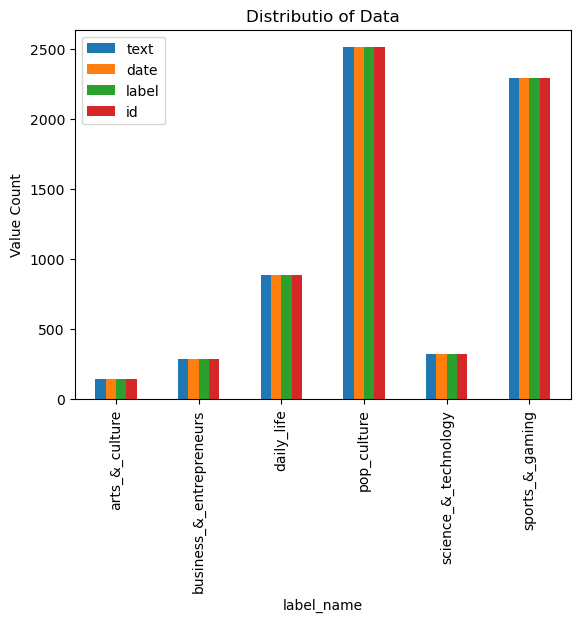

In [17]:
ax =df.groupby('label_name').count().plot(kind ='bar', title ='Distributio of Data')
plt.ylabel('Value Count')

<Axes: xlabel='label', ylabel='count'>

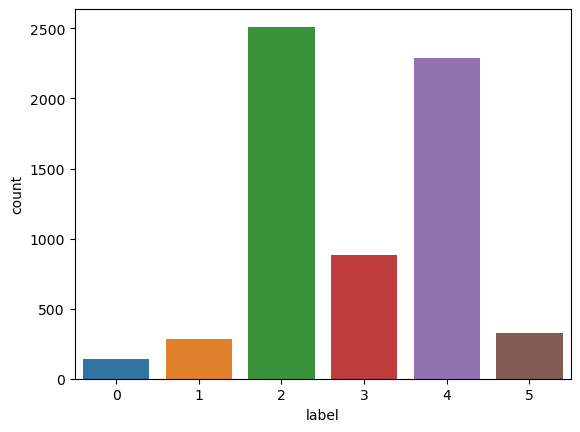

In [18]:
import seaborn as sns
sns.countplot(x='label', data=df)

# Pre-processing Data

# using stop words

In [19]:
from nltk.corpus import stopwords
df['text']=df['text'].str.lower()

In [20]:
stopwords_list = stopwords.words('english')

In [21]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [22]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

0    {@clinton lumberkings@} beat {@cedar rapids ke...
1    would rather hear eli gold announce auburn gam...
2    someone take phone away, i’m trying look {@chi...
3    year ago, louisville struggled beat fcs oppone...
4    anyone know #dodgers #orioles game next thursd...
Name: text, dtype: object

In [23]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [24]:
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

6438    praying username family friends riding ida saf...
6439    etsy username hi there sorry hear account clos...
6440    imagine hard teume everyone us look us fightin...
6441    ride  mental health awareness charity cycle ri...
6442    prediction future cx mckinsey company quarterl...
Name: text, dtype: object

# Using Stemming

In [25]:
st = nltk.PorterStemmer()
def stemming_on_text(df):
    text = [st.stem(word) for word in df]
    return df

df['text']= df['text'].apply(lambda x: stemming_on_text(x))

In [26]:
df['text'].head()

0    clinton lumberkings beat cedar rapids kernels ...
1    would rather hear eli gold announce auburn gam...
2    someone take phone away i’m trying look chicag...
3    year ago louisville struggled beat fcs opponen...
4    anyone know dodgers orioles game next thursday...
Name: text, dtype: object

# Using Lemmatization

In [27]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(df):
    text = [lm.lemmatize(word) for word in df]
    return df

df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))

In [28]:
df['text'].head()

0    clinton lumberkings beat cedar rapids kernels ...
1    would rather hear eli gold announce auburn gam...
2    someone take phone away i’m trying look chicag...
3    year ago louisville struggled beat fcs opponen...
4    anyone know dodgers orioles game next thursday...
Name: text, dtype: object

In [29]:
df

,text,date,label,id,label_name
0,clinton lumberkings beat cedar rapids kernels ...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,would rather hear eli gold announce auburn gam...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,someone take phone away i’m trying look chicag...,2019-09-08,4,1170516543387709440,sports_&_gaming
3,year ago louisville struggled beat fcs opponen...,2019-09-08,4,1170516620466429953,sports_&_gaming
4,anyone know dodgers orioles game next thursday...,2019-09-08,4,1170516711411310592,sports_&_gaming
...,...,...,...,...,...
6438,praying username family friends riding ida saf...,2021-08-29,3,1431979856120762370,daily_life
6439,etsy username hi there sorry hear account clos...,2021-08-29,1,1432008666018942977,business_&_entrepreneurs
6440,imagine hard teume everyone us look us fightin...,2021-08-29,2,1432008666803097606,pop_culture
6441,ride mental health awareness charity cycle ri...,2021-08-29,2,1432069101753491456,pop_culture


In [30]:
x= df['text']
x.head()

0    clinton lumberkings beat cedar rapids kernels ...
1    would rather hear eli gold announce auburn gam...
2    someone take phone away i’m trying look chicag...
3    year ago louisville struggled beat fcs opponen...
4    anyone know dodgers orioles game next thursday...
Name: text, dtype: object

In [31]:
y= df['label']
y.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [32]:
X = df.text.astype(str)

# splitting Data traning= 0.7, testing 0.3

In [33]:
# spliting Data for Training and Testing in two parts  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [34]:
y_train

2089    2
5506    5
2773    5
5869    2
5847    2
       ..
1144    4
48      4
772     2
5944    1
5327    5
Name: label, Length: 4510, dtype: int64

# Uni-gram for results using models 

In [35]:
#uni-gram
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1))

# Training data
X_train = vectorizer.fit_transform(X_train)

# Testing data
X_test = vectorizer.transform(X_test)

# Making prediction on the test set

In [36]:
# uni-gram
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Result")
rfc = RandomForestClassifier(n_estimators=100, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,pred))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))

from sklearn.svm import SVC
print("Support Vector Machine Result")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


Random Forest Result
0.7418520434557683
Decision Tree Result
0.6471805483704087
Support Vector Machine Result
0.8132436627004656
Logistic Regression Result
0.7672012415933782


# Compute Classification report

In [37]:
#uni-gram
print("Random Forest")
print(classification_report(y_test,pred))

print("Decision Tree")
print(classification_report(y_test,DecisionTree))

print("Support Vector Machine")
print(classification_report(y_test,y_pred))

print("Logistic Regression")
print(classification_report(y_test,logisticRegresion))

Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.58      0.18      0.28        77
           2       0.67      0.91      0.77       749
           3       0.76      0.40      0.53       272
           4       0.84      0.86      0.85       706
           5       0.76      0.27      0.39        98

    accuracy                           0.74      1933
   macro avg       0.60      0.44      0.47      1933
weighted avg       0.74      0.74      0.71      1933

Decision Tree
              precision    recall  f1-score   support

           0       0.08      0.06      0.07        31
           1       0.29      0.19      0.23        77
           2       0.67      0.76      0.71       749
           3       0.43      0.43      0.43       272
           4       0.77      0.73      0.75       706
           5       0.51      0.35      0.41        98

    accuracy                           0.65      

C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
X = df.text.astype(str)

In [39]:
# spliting for Training-Testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# bi-gram for results using models 

In [40]:
#bi-gram
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))

# Training Data
X_train = vectorizer.fit_transform(X_train)

# Testing Data
X_test = vectorizer.transform(X_test)

# Making prediction on the test set

In [41]:
# bi-gram
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Result")
rfc = RandomForestClassifier(n_estimators=100, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,pred))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))

from sklearn.svm import SVC
print("Support Vector Machine Result")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


Random Forest Result
0.6078634247284015
Decision Tree Result
0.5840662183135024
Support Vector Machine Result
0.7046042421107087
Logistic Regression Result
0.6642524573202276


# Compute Classification report

In [42]:
#bi-gram
print("Random Forest")
print(classification_report(y_test,pred))

print("Decision Tree")
print(classification_report(y_test,DecisionTree))

print("Support Vector Machine")
print(classification_report(y_test,y_pred))

print("Logistic Regression")
print(classification_report(y_test,logisticRegresion))

Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.38      0.04      0.07        77
           2       0.76      0.58      0.66       749
           3       0.67      0.23      0.34       272
           4       0.53      0.93      0.68       706
           5       0.70      0.21      0.33        98

    accuracy                           0.61      1933
   macro avg       0.51      0.33      0.35      1933
weighted avg       0.63      0.61      0.57      1933

Decision Tree
              precision    recall  f1-score   support

           0       0.15      0.06      0.09        31
           1       0.36      0.06      0.11        77
           2       0.73      0.59      0.65       749
           3       0.41      0.31      0.35       272
           4       0.57      0.81      0.67       706
           5       0.27      0.30      0.28        98

    accuracy                           0.58      

C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
X = df.text.astype(str)

In [44]:
# spliting for Training-Testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Tri-gram for results using models 

In [45]:
#Tri-gram
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(3,3))

# Training Data
X_train = vectorizer.fit_transform(X_train)

# Testing Data
X_test = vectorizer.transform(X_test)

# Making prediction on the test set

In [46]:
# tri-gram
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Result")
rfc = RandomForestClassifier(n_estimators=100, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,pred))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))

from sklearn.svm import SVC
print("Support Vector Machine Result")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


Random Forest Result
0.4842214174857734
Decision Tree Result
0.47594412829798244
Support Vector Machine Result
0.5328504914640455
Logistic Regression Result
0.4826694257630626


# Compute Classification report

In [47]:
#tri-gram
print("Random Forest")
print(classification_report(y_test,pred))

print("Decision Tree")
print(classification_report(y_test,DecisionTree))

print("Support Vector Machine")
print(classification_report(y_test,y_pred))

print("Logistic Regression")
print(classification_report(y_test,logisticRegresion))

Random Forest
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        31
           1       0.40      0.03      0.05        77
           2       0.67      0.34      0.45       749
           3       0.90      0.10      0.18       272
           4       0.43      0.91      0.58       706
           5       0.56      0.05      0.09        98

    accuracy                           0.48      1933
   macro avg       0.66      0.24      0.24      1933
weighted avg       0.60      0.48      0.42      1933

Decision Tree
              precision    recall  f1-score   support

           0       0.12      0.10      0.11        31
           1       0.19      0.04      0.06        77
           2       0.68      0.32      0.43       749
           3       0.69      0.12      0.21       272
           4       0.43      0.90      0.58       706
           5       0.50      0.07      0.12        98

    accuracy                           0.48      

C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
X = df.text.astype(str)

In [49]:
# spliting for Training-Testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# n-gram for results using models 

In [50]:
#n-gram
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3))

# Training Data
X_train = vectorizer.fit_transform(X_train)

# Testing Data
X_test = vectorizer.transform(X_test)

# Making prediction on the test set

In [51]:
# n-gram
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Result")
rfc = RandomForestClassifier(n_estimators=100, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,pred))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))

from sklearn.svm import SVC
print("Support Vector Machine Result")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


Random Forest Result
0.7284014485256078
Decision Tree Result
0.6368339368856699
Support Vector Machine Result
0.8085876875323331
Logistic Regression Result
0.7444386963269529


# Compute Classification report

In [52]:
#n-gram
print("Decision Tree")
print(classification_report(y_test,DecisionTree))

print("Random Forest")
print(classification_report(y_test,pred))

print("Logistic Regression")
print(classification_report(y_test,logisticRegresion))

print("Support Vector Machine")
print(classification_report(y_test,y_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.12      0.10      0.11        31
           1       0.31      0.29      0.30        77
           2       0.66      0.76      0.71       749
           3       0.43      0.39      0.41       272
           4       0.77      0.72      0.74       706
           5       0.37      0.27      0.31        98

    accuracy                           0.64      1933
   macro avg       0.44      0.42      0.43      1933
weighted avg       0.63      0.64      0.63      1933

Random Forest
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        31
           1       0.50      0.08      0.13        77
           2       0.65      0.91      0.76       749
           3       0.71      0.33      0.45       272
           4       0.84      0.86      0.85       706
           5       0.78      0.21      0.34        98

    accuracy                           0.73      

C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
